# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(25496, 25496)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-04-03 09:23:38,liquid,bitbank,BTC/JPY,0.006,20
1,2021-04-03 09:26:36,bitbank,liquid,BTC/JPY,0.006,-5
2,2021-04-03 09:28:12,liquid,bitbank,BTC/JPY,0.006,41
3,2021-04-03 09:29:04,bitbank,liquid,BTC/JPY,0.006,-32
4,2021-04-03 09:29:07,liquid,bitbank,BTC/JPY,0.006,19
...,...,...,...,...,...,...
847,2021-04-04 07:14:59,bitbank,liquid,BTC/JPY,0.006,-41
848,2021-04-04 07:15:03,liquid,bitbank,BTC/JPY,0.006,45
849,2021-04-04 07:17:33,bitbank,liquid,BTC/JPY,0.006,-37
850,2021-04-04 07:19:23,liquid,bitbank,BTC/JPY,0.006,47


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-04-03 09:23:38,liquid,買い,6566619.0
1,2021-04-03 09:23:38,bitbank,売り,6569994.0
2,2021-04-03 09:26:36,bitbank,買い,6564577.0
3,2021-04-03 09:26:36,liquid,売り,6563709.0
4,2021-04-03 09:28:12,liquid,買い,6556086.0
...,...,...,...,...
1699,2021-04-04 07:17:33,liquid,売り,6381768.0
1700,2021-04-04 07:19:23,liquid,買い,6395300.0
1701,2021-04-04 07:19:23,bitbank,売り,6403186.0
1702,2021-04-04 07:19:36,bitbank,買い,6403599.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                25496
           取引回数                  852
           開始日時  2021-04-03 09:23:38
           終了日時  2021-04-04 07:20:10
        取引時間[H]      0 days 21:56:32
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 6747
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      13846
利益[JPY]       3846
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]   152703
終了[TOTAL]   156550
利益[TOTAL]  3846.62
-----------  -------


## グラフ出力

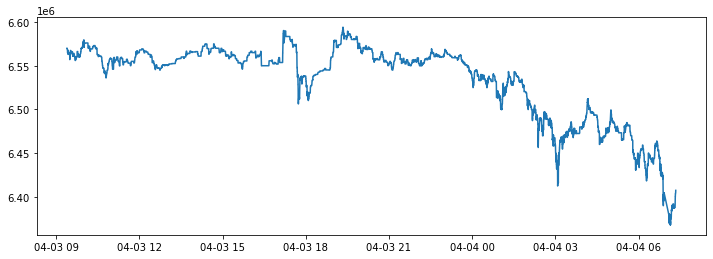

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

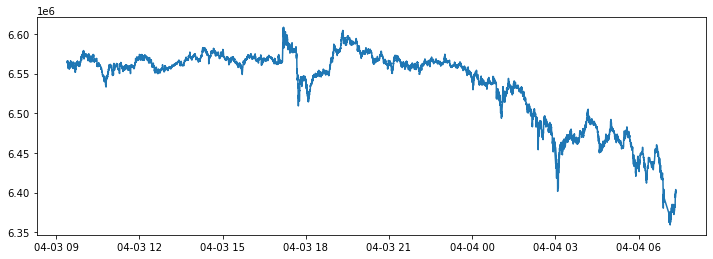

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-04-03 09:20:00,-4775,2120,6564808,6562688,6561231,6566007
2021-04-03 09:30:00,-3788,1852,6563880,6562028,6560909,6564697
2021-04-03 09:40:00,-1352,-55,6560833,6560888,6559694,6561046
2021-04-03 09:50:00,-341,-1618,6569007,6570625,6569401,6569742
2021-04-03 10:00:00,-3345,1957,6575281,6573323,6572068,6575413
...,...,...,...,...,...,...
2021-04-04 06:40:00,-6143,4495,6442517,6438022,6436917,6443060
2021-04-04 06:50:00,-6088,4069,6414645,6410576,6409045,6415133
2021-04-04 07:00:00,-7479,4984,6373989,6369005,6367199,6374678
